# Chapter 2 Wrap up พื้นฐาน NLP

# ดาวโหลด Library เพื่อใช้ในการประมวลผลข้อมูล

In [ ]:
!pip install pythainlp[full] # library ที่ใช้ในการทำประมวลผลภาษาไทย 
!pip install pandas #library สำหรับการจัดการข้อมูล DataFrame
!pip install epitran
!pip install sklearn_crfsuite
!pip install tensorflow deepcut
!pip install attacut

     |████████████████████████████████| 1.3MB 6.8MB/s 
     |████████████████████████████████| 481kB 16.9MB/s 
     |████████████████████████████████| 645kB 41.1MB/s 
     |████████████████████████████████| 133kB 31.1MB/s 
     |████████████████████████████████| 870kB 36.8MB/s 
     |████████████████████████████████| 194kB 41.1MB/s 
     |████████████████████████████████| 1.2MB 43.2MB/s 
     |████████████████████████████████| 1.7MB 45.8MB/s 
     |████████████████████████████████| 1.5MB 41.7MB/s 
     |████████████████████████████████| 143kB 47.2MB/s 
     |████████████████████████████████| 2.2MB 40.0MB/s 
     |████████████████████████████████| 92kB 9.3MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 133kB 46.6MB/s 
     |████████████████████████████████| 276kB 42.4MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 3.3MB 39.2MB/s 
     |████████████████████████████████| 51kB 2.4MB/s 
 

# Tokenization 
สัณฐานวิทยา (Morphology) คือการศึกษาคำศัพท์วิธีการสร้างและความสัมพันธ์กับคำอื่น ๆ ในภาษาเดียวกัน

การตัดคำ (word tokenization) การแปลงข้อมูลคำพูดให้อยู่ในรูปแบบของคำและให้คอมพิวเตอร์จดจำเป็นตัวเลขเฉพาะ (id)


Longest matching คือการตัดคำด้วยการหาคำที่ยาวที่สุดจากพจนานุกรมและตัดคำออกมากจากประโยค 
ขั้นตอน Longest matching
1. เริ่มหาคำจากตัวอักษรแรกของประโยค หาคำที่ยาวที่สุดโดยเริ่มจากตัวอักษรนี้ 
2. ถ้าเจอคำจะสร้างขอบเขตของคำและทำการตัดคำ
3. ถ้าไม่เจอจะเปรียบตัวอีกษรนั้นเป็นคำและทำการตัดตัวอักษรเป็นคำ 
4.   วนต่อไปจนกว่าจะตัวสุดท้าย





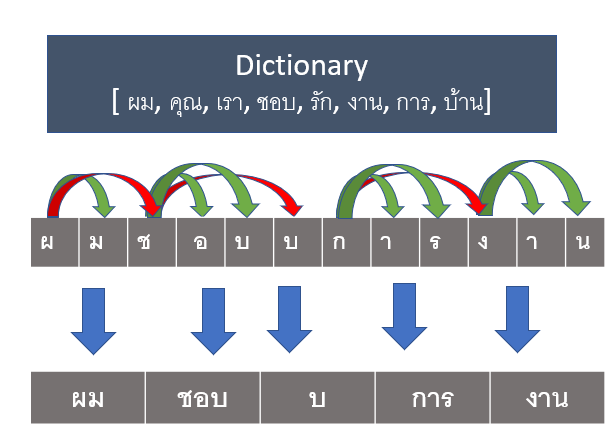


ตัดคำไทยด้วย library pythainlp
github: https://github.com/PyThaiNLP/pythainlp


เริ่มลงมือตัดคำได้เลย


ตัดคำของภาษาอังกฤษ

In [ ]:
eng_text = "Hello This is second chapter of NLP by Tung"

eng_tokenized_text = eng_text.split(' ')
print(eng_tokenized_text)

['Hello', 'This', 'is', 'second', 'chapter', 'of', 'NLP', 'by', 'Tung']


ตัดคำของไทย

In [ ]:
from pythainlp import word_tokenize

text = "Chapterที่สอง การประมวลผลข้อมูล สอนโดยคุณตั๋ง"
tokenized_text = word_tokenize(text, engine='longest')
print(tokenized_text)

['chapter', 'ที่สอง', ' ', 'การประมวลผลข้อมูล', ' ', 'สอน', 'โดย', 'คุณ', 'ตั๋ง']


word_tokenize(text: str, custom_dict: Optional[marisa_trie.Trie] = None, engine: str = 'newmm', keep_whitespace: bool = True) → List[str]


Parameters : 


*   text (str) – ข้อความที่เราอยากให้ใช้ในการตัดคำ
*   engine (str) – ตัวตัดคำที่เราอยากใช้งาน
*   custom_dict (dict) – a dictionary trie
*   keep_whitespace (bool) – True to keep whitespaces, a common mark for end of phrase in Thai



ตัวตัดคำที่ library มีให้เลือก

*   newmm (default) - dictionary-based, Maximum Matching + Thai Character Cluster
* longest - dictionary-based, Longest Matching
* deepcut - wrapper for deepcut, language-model-based https://github.com/rkcosmos/deepcut
* icu - wrapper for ICU (International Components for Unicode, using PyICU), dictionary-based
* ulmfit - for thai2fit
* a custom_dict can be provided for newmm, longest, and deepcut





In [ ]:
import pythainlp
newmm_tokenizer = word_tokenize(text,engine="newmm")

icu_tokenizer = word_tokenize(text,engine="icu")


In [ ]:
print("newmm    :", word_tokenize(text))  
print("longest  :", word_tokenize(text, engine="longest"))
print("icu      :", word_tokenize(text, engine="icu"))
print("deepcut  :", word_tokenize(text, engine="deepcut"))

newmm    : ['Chapter', 'ที่สอง', ' ', 'การประมวลผลข้อมูล', ' ', 'สอน', 'โดย', 'คุณ', 'ตั๋ง']
longest  : ['chapter', 'ที่สอง', ' ', 'การประมวลผลข้อมูล', ' ', 'สอน', 'โดย', 'คุณ', 'ตั๋ง']
multi_cut: ['Chapter', 'ที่สอง', ' ', 'การประมวลผลข้อมูล', ' ', 'สอน', 'โดย', 'คุณ', 'ตั๋ง']
icu      : [' ', 'Chapter', ' ', 'ที่', 'สอง', ' ', 'การ', 'ประมวล', 'ผล', 'ข้อมูล', ' ', 'สอน', 'โดย', 'คุณ', 'ตั๋ง']
deepcut  : ['Chapter', 'ที่', 'สอง', ' ', 'การ', 'ประมวล', 'ผล', 'ข้อมูล', ' ', 'สอน', 'โดย', 'คุณตั๋ง']


Test ความเร็วในการตัดคำ

µs per loop : microsecond (10^-6 seconds) per loop 

ms per loop : millisecond (10^-3 seconds) per loop

In [ ]:

%%timeit 
word_tokenize(text)

1000 loops, best of 5: 294 µs per loop


In [ ]:
%%timeit
word_tokenize(text, engine="longest")

10000 loops, best of 5: 166 µs per loop


In [ ]:
%%timeit
word_tokenize(text, engine="icu")

The slowest run took 7.57 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 25.3 µs per loop


In [ ]:
%%timeit
word_tokenize(text,engine="deepcut")

10 loops, best of 5: 55.8 ms per loop


# Text Clean 

In [ ]:
import re
import string
from pythainlp.corpus.common import thai_stopwords

def clean_text(txt):
    
    
    # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    txt = re.sub(r'<.@*?!>','', txt)
    
    # ลบ hashtag
    txt = re.sub(r'#','',txt)
    
    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
        txt = re.sub(r'\{}'.format(c),'',txt)
    
    # ลบ separator เช่น \n \t
    txt = ' '.join(txt.split())

    
    return txt
  

In [ ]:
from pythainlp.corpus.common import thai_stopwords

frozenset({'อย่างมาก', 'เมื่อนั้น', 'ตลอดทั่ว', 'วันนี้', 'อันจะ', 'หาความ', 'ออก', 'บัดนี้', 'เสียด้วย', 'สุด', 'ให้', 'ทัน', 'แห่งไหน', 'กว้างขวาง', 'ยิ่งจน', 'ของ', 'อันที่จริง', 'กลุ่ม', 'ทั้งนี้', 'เกี่ยวข้อง', 'ล้วน', 'วันไหน', 'เฉพาะ', 'ก็ตามที', 'เห็นว่า', 'พวกเขา', 'เสร็จ', 'แค่นี้', 'พวก', 'พา', 'แต่ก็', 'อันที่จะ', 'แต่อย่างใด', 'ตามๆ', 'ได้มา', 'เป็นดัง', 'อันละ', 'ทีใด', 'ภายใต้', 'ครั้งที่', 'อย่างใด', 'อดีต', 'อย่างหนึ่ง', 'หลัง', 'พื้นๆ', 'หลาย', 'จ้ะ', 'ขวางๆ', 'ใดๆ', 'สูงส่ง', 'ครัน', 'นู้น', 'จง', 'ช่วงๆ', 'คง', 'อื่นๆ', 'ซะจน', 'จริงจัง', 'แค่ไหน', 'คราวก่อน', 'ครั้ง', 'นอกเหนือ', 'ไป', 'เป็นเพียงว่า', 'พวกท่าน', 'ผล', 'นู่น', 'ใกล้', 'ที่นั้น', 'บอกว่า', 'มั้ยนั่น', 'พวกโน้น', 'ขึ้น', 'ครั้งหลัง', 'ใหญ่', 'ยิ่งกว่า', 'ส่วนนั้น', 'เป็นต้นไป', 'มักจะ', 'ครานี้', 'เข้า', 'จัดการ', 'ด้วยเพราะ', 'กู', 'มองว่า', 'ด้วยว่า', 'สืบเนื่อง', 'ทุกครา', 'ช่วงที่', 'ตามที่', 'เพราะฉะนั้น', 'โตๆ', 'มา', 'ไง', 'ตรง', 'สิ่งนี้', 'ดังกับว่า', 'เพิ่ง', 'น่ะ', 'เรา', 'ดังเก่า', 'จัดแจง

In [ ]:
dirty_text = "สวัสดีวันจันทร์ครับ\n@tungdatasci \tวันนี้เรียนคอร์สNLPสนุกจัง! \n#zero2hero"

print("ข้อความที่ยังไม่ถูก   clean:",dirty_text)
print("ข้อความหลังจากที่ถูก clean:",clean_text(dirty_text))




ข้อความที่ยังไม่ถูก   clean: สวัสดีวันจันทร์ครับ
@tungdatasci 	วันนี้เรียนคอร์สNLPสนุกจัง! 
#zero2hero
ข้อความหลังจากที่ถูก clean: สวัสดีวันจันทร์ครับ tungdatasci วันนี้เรียนคอร์สNLPสนุกจัง zero2hero


In [ ]:

from pythainlp.corpus.common import thai_stopwords

print(thai_stopwords(),"\n\n")
def rm_stw(txt):
  rm_stw_txt =[]
  for i in txt:
    if i not in thai_stopwords():
      rm_stw_txt.append(i)
  return rm_stw_txt
      
tokenized_txt = word_tokenize(clean_text(dirty_text))
print(tokenized_txt)
print(rm_stw(tokenized_txt))


frozenset({'อย่างมาก', 'เมื่อนั้น', 'ตลอดทั่ว', 'วันนี้', 'อันจะ', 'หาความ', 'ออก', 'บัดนี้', 'เสียด้วย', 'สุด', 'ให้', 'ทัน', 'แห่งไหน', 'กว้างขวาง', 'ยิ่งจน', 'ของ', 'อันที่จริง', 'กลุ่ม', 'ทั้งนี้', 'เกี่ยวข้อง', 'ล้วน', 'วันไหน', 'เฉพาะ', 'ก็ตามที', 'เห็นว่า', 'พวกเขา', 'เสร็จ', 'แค่นี้', 'พวก', 'พา', 'แต่ก็', 'อันที่จะ', 'แต่อย่างใด', 'ตามๆ', 'ได้มา', 'เป็นดัง', 'อันละ', 'ทีใด', 'ภายใต้', 'ครั้งที่', 'อย่างใด', 'อดีต', 'อย่างหนึ่ง', 'หลัง', 'พื้นๆ', 'หลาย', 'จ้ะ', 'ขวางๆ', 'ใดๆ', 'สูงส่ง', 'ครัน', 'นู้น', 'จง', 'ช่วงๆ', 'คง', 'อื่นๆ', 'ซะจน', 'จริงจัง', 'แค่ไหน', 'คราวก่อน', 'ครั้ง', 'นอกเหนือ', 'ไป', 'เป็นเพียงว่า', 'พวกท่าน', 'ผล', 'นู่น', 'ใกล้', 'ที่นั้น', 'บอกว่า', 'มั้ยนั่น', 'พวกโน้น', 'ขึ้น', 'ครั้งหลัง', 'ใหญ่', 'ยิ่งกว่า', 'ส่วนนั้น', 'เป็นต้นไป', 'มักจะ', 'ครานี้', 'เข้า', 'จัดการ', 'ด้วยเพราะ', 'กู', 'มองว่า', 'ด้วยว่า', 'สืบเนื่อง', 'ทุกครา', 'ช่วงที่', 'ตามที่', 'เพราะฉะนั้น', 'โตๆ', 'มา', 'ไง', 'ตรง', 'สิ่งนี้', 'ดังกับว่า', 'เพิ่ง', 'น่ะ', 'เรา', 'ดังเก่า', 'จัดแจง

# Text Normalization

In [ ]:
import re
tm_text = "ข้อมูลเพิ่มเติมเรื่องการประมวลผลข้อความ ติดต่อได้ที่คุณตั๋ง 081-811-8772 หรือ คุณสมพงษ์ 082-753-5025"
print("newmm    :", word_tokenize(tm_text))  

tm_text_replace = tm_text.replace('-','')
print("newmm    :", word_tokenize(tm_text_replace))  

for i in re.findall(r"[\d]{3}-[\d]{3}-[\d]{4}", tm_text):
  tm_text = tm_text.replace(i,'phone')
print("newmm    :", word_tokenize(tm_text)) 

newmm    : ['ข้อมูล', 'เพิ่มเติม', 'เรื่อง', 'การประมวลผล', 'ข้อความ', ' ', 'ติดต่อ', 'ได้ที่', 'คุณ', 'ตั๋ง', ' ', '081', '-', '811', '-', '8772', ' ', 'หรือ', ' ', 'คุณ', 'สม', 'พงษ์', ' ', '082', '-', '753', '-', '5025']
newmm    : ['ข้อมูล', 'เพิ่มเติม', 'เรื่อง', 'การประมวลผล', 'ข้อความ', ' ', 'ติดต่อ', 'ได้ที่', 'คุณ', 'ตั๋ง', ' ', '0818118772', ' ', 'หรือ', ' ', 'คุณ', 'สม', 'พงษ์', ' ', '0827535025']
newmm    : ['ข้อมูล', 'เพิ่มเติม', 'เรื่อง', 'การประมวลผล', 'ข้อความ', ' ', 'ติดต่อ', 'ได้ที่', 'คุณ', 'ตั๋ง', ' ', 'phone', ' ', 'หรือ', ' ', 'คุณ', 'สม', 'พงษ์', ' ', 'phone']


# Normalization

In [ ]:
import re

from pythainlp import thai_tonemarks

_NORMALIZE_RULE1 = [
    "ะ",
    "ั",
    "็",
    "า",
    "ิ",
    "ี",
    "ึ",
    "่",
    "ํ",
    "ุ",
    "ู",
    "ใ",
    "ไ",
    "โ",
    "ื",
    "่",
    "้",
    "๋",
    "๊",
    "ึ",
    "์",
    "๋",
    "ำ",
]  # เก็บพวกสระ วรรณยุกต์ที่ซ้ำกันแล้วมีปัญหา


_NORMALIZE_RULE2 = [
    ("เเ", "แ"),  # เ เ -> แ
    ("ํ(t)า", "\\1ำ"),
    ("ํา(t)", "\\1ำ"),
    ("([่-๋])([ัิ-ื])", "\\2\\1"),
    ("([่-๋])([ูุ])", "\\2\\1"),
    ("ำ([่-๋])", "\\1ำ"),
    ("(์)([ัิ-ู])", "\\2\\1"),
]  # เก็บพวก พิมพ์ลำดับผิดหรือผิดแป้นแต่กลับแสดงผลถูกต้อง ให้ไปเป็นแป้นที่ถูกต้อง เช่น เ + เ ไปเป็น แ



def normalize(text: str) -> str:
    """
    Thai text normalize

    :param str text: thai text
    :return: thai text
    **Example**::
     >>> print(normalize("เเปลก")=="แปลก") # เ เ ป ล ก กับ แปลก
     True
    """
    for data in _NORMALIZE_RULE2:
        text = re.sub(data[0].replace("t", "[่้๊๋]"), data[1], text)
    for data in list(zip(_NORMALIZE_RULE1, _NORMALIZE_RULE1)):
        text = re.sub(data[0].replace("t", "[่้๊๋]") + "+", data[1], text)
    return text


In [ ]:
unnormalized_text = "สวัสดีค่าา วันนี้เรียนสนุกมาก ได้ความรู้เยอะะ"

print( normalize(unnormalized_text))

สวัสดีค่า วันนี้เรียนสนุกมาก ได้ความรู้เยอะ


# Spelling correction

In [ ]:
misspell_text = 'ธนคาร'

print(pythainlp.spell(misspell_text))
print(pythainlp.correct(misspell_text))

['ธนาคาร', 'ธนสาร']
ธนาคาร
